# Netflix Movies and Shows EDA 


## Import all necessary libraries

In [179]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/netflix-shows/netflix_titles.csv


## Load the Dataset

In [180]:
netflix = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv", index_col=0)
netflix.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data description

In [181]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [182]:
netflix.shape

(8807, 11)

In [183]:
netflix.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Data cleaning and preparation

In [184]:
netflix.dtypes 
# we need date_added to be in DateTime type

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Cleaning and changing date to datetime type 

In [185]:
netflix.date_added = pd.to_datetime(netflix["date_added"].str.strip(), format="%B %d, %Y")


In [186]:
netflix.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

### Netflix movies release year distribution

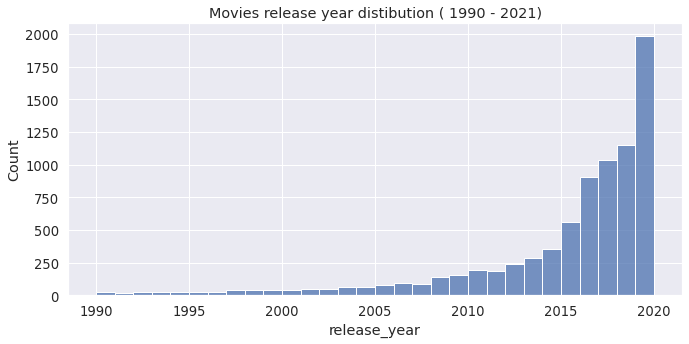

In [187]:
plt.figure(figsize=(11,5))
sns.set_theme(style='darkgrid', palette='deep',font='sans-serif', font_scale=1.2,)
sns.histplot(x="release_year", data=netflix, bins=np.arange(1990,2021,1))
plt.title("Movies release year distibution ( 1990 - 2021)")
plt.show()

### First movie released from Neteflix

In [188]:
netflix.release_year.min()
netflix.loc[netflix.release_year == 1925][["title","release_year"]]

,title,release_year
show_id,,
s4251,Pioneers: First Women Filmmakers*,1925


### When are the movies added to the database 

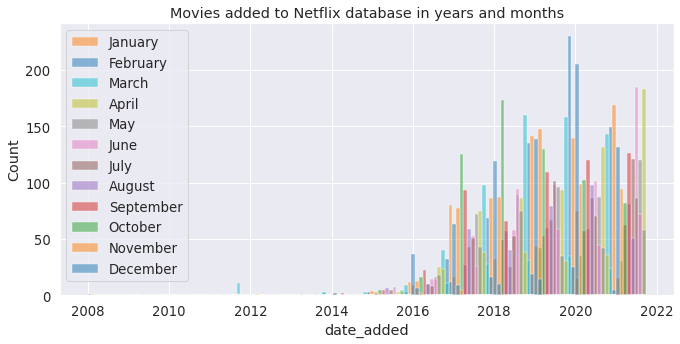

In [189]:
months = [
'January','February','March','April','May','June','July','August','September','October','November','December'];
plt.figure(figsize=(11,5))
sns.histplot(x="date_added", data=netflix, bins=150, palette="tab10" ,hue=netflix.date_added.dt.month)
plt.title("Movies added to Netflix database in years and months")
plt.legend(months)
plt.show()

### Countries with the highest amount of production

In [193]:
country = netflix['country'].str.split(', ').explode().value_counts().head(10)
country
#sort the unique value counts

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

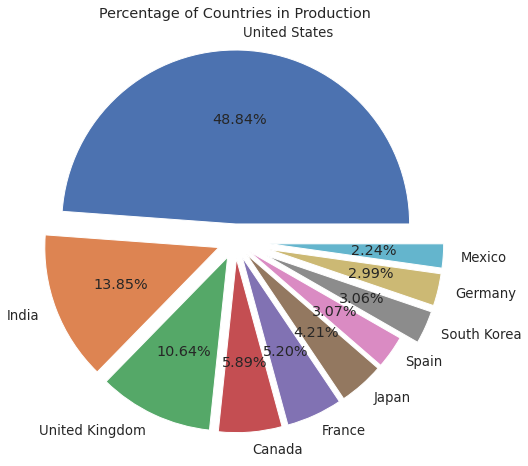

In [200]:
plt.figure(figsize=(9, 8))
plt.pie(x=country.values, labels=country.index, autopct='%.2f%%',
       explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.2])
plt.title('Percentage of Countries in Production')
plt.show()

### Total No. of Moives & Tv Shows 


In [205]:
types = netflix["type"].value_counts()

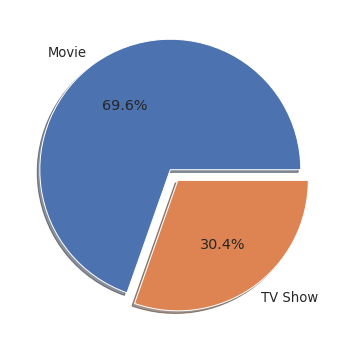

In [207]:
plt.figure(figsize=(15,6),)
plt.pie(types,labels=types.index,autopct="%0.1f%%",explode=[0,0.1],shadow=True);

Quantity of Movies is more than Tv Shows On Netflix 

### Top 10 Directors 

In [208]:
direc= netflix["director"].value_counts().sort_values(ascending=False)[1:11]
direc=direc.reset_index()
direc

,index,director
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Suhas Kadav,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Youssef Chahine,12
6,Jay Chapman,12
7,Martin Scorsese,12
8,Steven Spielberg,11
9,Don Michael Paul,10


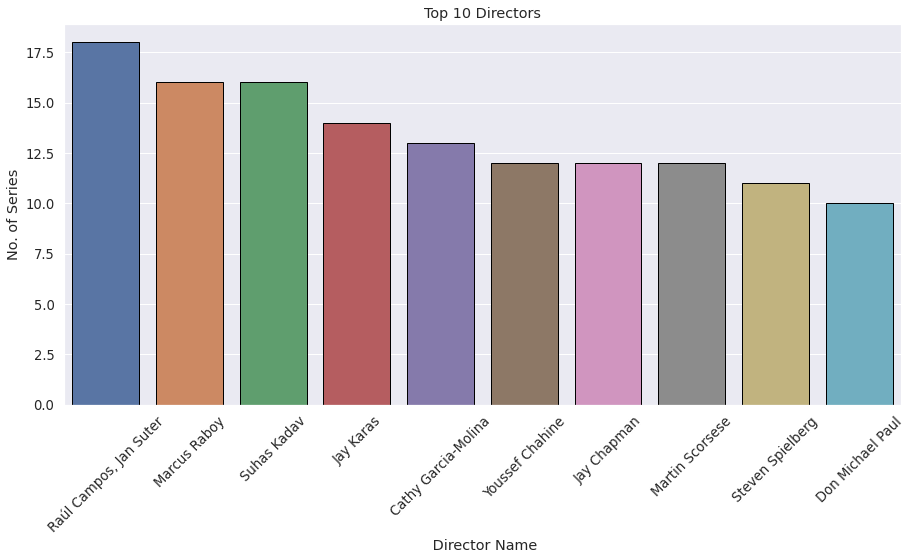

In [212]:
plt.figure(figsize=(15,7))
sns.barplot(x=direc["index"],y=direc["director"],data=direc,edgecolor="black")
plt.xticks(rotation=45)
plt.xlabel(" Director Name")
plt.ylabel("No. of Series")
plt.title("Top 10 Directors");

### Moives And Tv Show's Trends

In [216]:
movie= netflix[netflix["type"]=="Movie"].groupby(["release_year"])["release_year"].count().sort_values()
movie

release_year
1963      1
1966      1
1946      1
1947      1
1961      1
       ... 
2020    517
2019    633
2016    658
2017    767
2018    767
Name: release_year, Length: 73, dtype: int64

In [217]:
series= netflix[netflix["type"]=="TV Show"].groupby(["release_year"])["release_year"].count().sort_values()
series

release_year
1925      1
1991      1
1989      1
1981      1
1979      1
1977      1
1985      1
1972      1
1967      1
1963      1
1946      1
1945      1
1974      1
1995      2
1986      2
1988      2
1994      2
1990      3
1992      3
1996      3
2000      4
1998      4
1993      4
1997      4
2001      5
1999      7
2002      7
2004      9
2003     10
2005     13
2007     14
2006     14
2008     23
2009     34
2010     40
2011     40
2013     63
2012     64
2014     88
2015    162
2016    244
2017    265
2021    315
2018    380
2019    397
2020    436
Name: release_year, dtype: int64

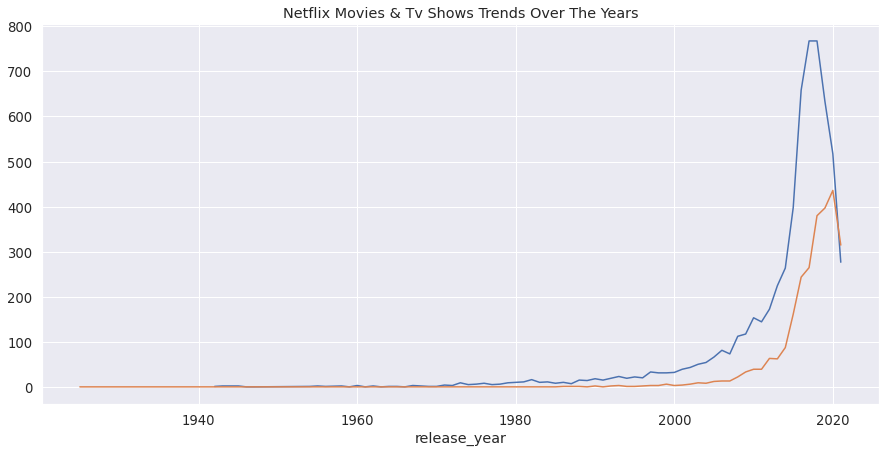

In [218]:
plt.figure(figsize=(15,7))
sns.lineplot(x=movie.index,y=movie.values)
sns.lineplot(x=series.index,y=series.values)
plt.title("Netflix Movies & Tv Shows Trends Over The Years");

### Which Actor Has Most Project On Netfilx

In [225]:
netflix["cast"].replace(np.nan,"No Cast",inplace=True)
l=netflix["cast"].str.split(",")
l

show_id
s1                                               [No Cast]
s2       [Ama Qamata,  Khosi Ngema,  Gail Mabalane,  Th...
s3       [Sami Bouajila,  Tracy Gotoas,  Samuel Jouy,  ...
s4                                               [No Cast]
s5       [Mayur More,  Jitendra Kumar,  Ranjan Raj,  Al...
                               ...                        
s8803    [Mark Ruffalo,  Jake Gyllenhaal,  Robert Downe...
s8804                                            [No Cast]
s8805    [Jesse Eisenberg,  Woody Harrelson,  Emma Ston...
s8806    [Tim Allen,  Courteney Cox,  Chevy Chase,  Kat...
s8807    [Vicky Kaushal,  Sarah-Jane Dias,  Raaghav Cha...
Name: cast, Length: 8807, dtype: object

In [228]:
cast=[]
for x in l:
    for j in x:
        cast.append(j)
        

In [231]:
cast1=pd.DataFrame(cast)
castt=cast1.value_counts()[1:21].to_frame()
castt=castt.rename(columns={0:"count"}).reset_index()
castt

,0,count
0,Anupam Kher,39
1,Rupa Bhimani,31
2,Takahiro Sakurai,30
3,Julie Tejwani,28
4,Om Puri,27
5,Shah Rukh Khan,26
6,Rajesh Kava,26
7,Yuki Kaji,25
8,Paresh Rawal,25
9,Boman Irani,25


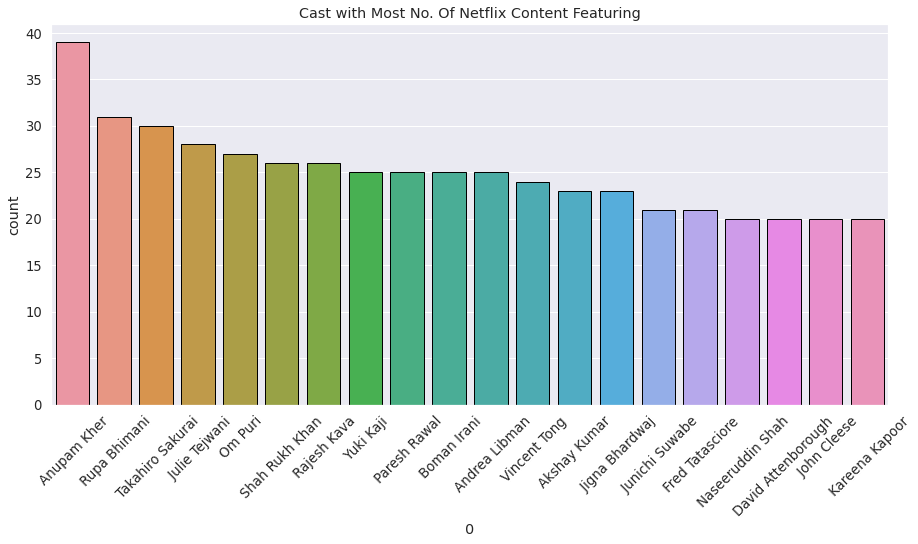

In [232]:
plt.figure(figsize=(15,7))
sns.barplot(x=castt[0],y=castt["count"],data=castt,edgecolor="Black")
plt.xticks(rotation=45)
plt.title("Cast with Most No. Of Netflix Content Featuring")
plt.show()

### Oldest Moives On Netflix 

In [238]:
old = netflix[netflix["release_year"]<1985][["title","release_year",]].sort_values(by="release_year").head(10)
old 

,title,release_year
show_id,,
s4251,Pioneers: First Women Filmmakers*,1925
s7791,Prelude to War,1942
s8206,The Battle of Midway,1942
s8661,Undercover: How to Operate Behind Enemy Lines,1943
s8764,WWII: Report from the Aleutians,1943
s8740,Why We Fight: The Battle of Russia,1943
s8641,Tunisian Victory,1944
s8437,The Negro Soldier,1944
s8420,The Memphis Belle: A Story of a\nFlying Fortress,1944


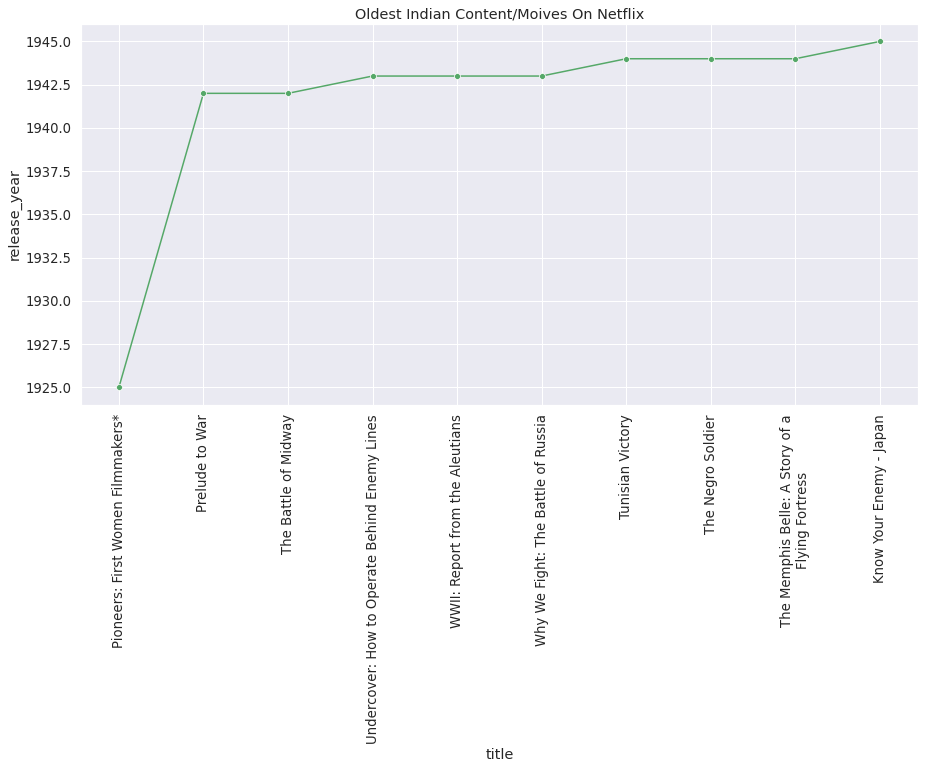

In [239]:
plt.figure(figsize=(15,7))
sns.lineplot(x="title",y="release_year",data=old,marker="o",color="g",)
plt.title("Oldest Indian Content/Moives On Netflix")
plt.xticks(rotation=90);

Analysis Finished